In [1]:
import yfinance as yf

In [2]:
apple = yf.Ticker('AAPL')
print(apple.info)

{'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '(408) 996-1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as w

In [3]:
import pandas as pd

# Downloading Historical Data

apple = yf.Ticker("AAPL")
start_date = "2021-01-01"
end_date = "2023-01-01"
historical_data = apple.history(start = start_date,end = end_date)
print(historical_data)

                                 Open        High         Low       Close  \
Date                                                                        
2021-01-04 00:00:00-05:00  130.101364  130.189056  123.514445  126.096596   
2021-01-05 00:00:00-05:00  125.589902  128.366937  125.141673  127.655617   
2021-01-06 00:00:00-05:00  124.449870  127.694610  123.144175  123.358543   
2021-01-07 00:00:00-05:00  125.073466  128.259745  124.586268  127.567917   
2021-01-08 00:00:00-05:00  129.039251  129.234143  126.895583  128.668991   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00  129.099285  130.578424  127.837087  130.026215   
2022-12-27 00:00:00-05:00  129.552881  129.582462  126.929870  128.221649   
2022-12-28 00:00:00-05:00  127.866678  129.207765  124.119529  124.287163   
2022-12-29 00:00:00-05:00  126.210022  128.665391  125.953643  127.807495   
2022-12-30 00:00:00-05:00  126.624196  128.142773  125.657822  128.123047   

In [4]:
# Handing Multiple Stocks

stock_list = ['AAPL','MSFT','AMZN']
data = yf.download(stock_list, start=start_date,end=end_date)
print(data.head())

C:\Users\heman_q\AppData\Local\Temp\ipykernel_20828\1902462478.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_list, start=start_date,end=end_date)
[*********************100%***********************]  3 of 3 completed

Price            Close                                High              \
Ticker            AAPL        AMZN        MSFT        AAPL        AMZN   
Date                                                                     
2021-01-04  126.096596  159.331497  209.617203  130.189056  163.600006   
2021-01-05  127.655617  160.925507  209.819397  128.366937  161.169006   
2021-01-06  123.358543  156.919006  204.378906  127.694610  159.875504   
2021-01-07  127.567917  158.108002  210.194962  128.259745  160.427002   
2021-01-08  128.668991  159.134995  211.475632  129.234143  159.531998   

Price                          Low                                Open  \
Ticker            MSFT        AAPL        AMZN        MSFT        AAPL   
Date                                                                     
2021-01-04  214.730285  123.514445  157.201004  206.844000  130.101364   
2021-01-05  210.416415  125.141673  158.253006  207.700985  125.589902   
2021-01-06  208.461675  123.144175  1

In [5]:
# Analyzing Historical Stock Prices

apple = yf.Ticker("AAPL")
historical_data = apple.history(start= start_date,end = end_date)
# Calculate 50 - day SMA
historical_data['SMA_50'] = historical_data['Close'].rolling(window = 50).mean()
print(historical_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2021-01-04 00:00:00-05:00  130.101364  130.189056  123.514445  126.096596   
2021-01-05 00:00:00-05:00  125.589902  128.366937  125.141673  127.655617   
2021-01-06 00:00:00-05:00  124.449870  127.694610  123.144175  123.358543   
2021-01-07 00:00:00-05:00  125.073466  128.259745  124.586268  127.567917   
2021-01-08 00:00:00-05:00  129.039251  129.234143  126.895583  128.668991   

                              Volume  Dividends  Stock Splits  SMA_50  
Date                                                                   
2021-01-04 00:00:00-05:00  143301900        0.0           0.0     NaN  
2021-01-05 00:00:00-05:00   97664900        0.0           0.0     NaN  
2021-01-06 00:00:00-05:00  155088000        0.0           0.0     NaN  
2021-01-07 00:00:00-05:00  109578200        0.0           0.0     NaN  
2021-01-08 00:00:00-05:00  1

In [6]:
# Calculating technical indicators

apple = yf.Ticker("AAPL")
historical_data = apple.history(start = start_date,end = end_date)

delta = historical_data['Close'].diff(1)
gain = delta.where(delta > 0,0)
loss = -delta.where(delta < 0,0)

avg_gain = gain.rolling(window = 14).mean()
avg_loss = loss.rolling(window = 14). mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
historical_data['RSI'] = rsi
print(historical_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2021-01-04 00:00:00-05:00  130.101364  130.189056  123.514445  126.096596   
2021-01-05 00:00:00-05:00  125.589902  128.366937  125.141673  127.655617   
2021-01-06 00:00:00-05:00  124.449870  127.694610  123.144175  123.358543   
2021-01-07 00:00:00-05:00  125.073466  128.259745  124.586268  127.567917   
2021-01-08 00:00:00-05:00  129.039251  129.234143  126.895583  128.668991   

                              Volume  Dividends  Stock Splits  RSI  
Date                                                                
2021-01-04 00:00:00-05:00  143301900        0.0           0.0  NaN  
2021-01-05 00:00:00-05:00   97664900        0.0           0.0  NaN  
2021-01-06 00:00:00-05:00  155088000        0.0           0.0  NaN  
2021-01-07 00:00:00-05:00  109578200        0.0           0.0  NaN  
2021-01-08 00:00:00-05:00  105158200        0.

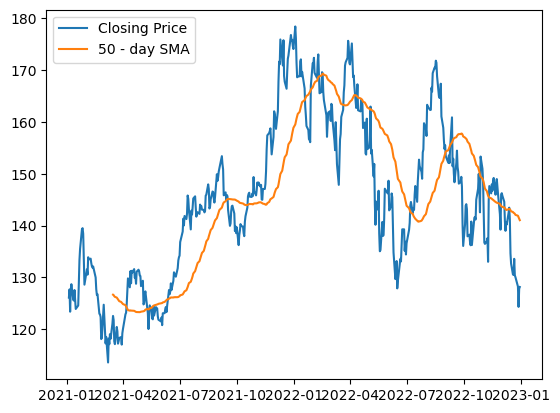

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

apple = yf.Ticker("AAPL")
historical_data = apple.history(start = start_date, end = end_date)
historical_data['SMA_50'] = historical_data['Close'].rolling(window = 50).mean()

plt.plot(historical_data['Close'], label = 'Closing Price')
plt.plot(historical_data['SMA_50'], label = '50 - day SMA')
plt.legend()
plt.show()

In [8]:
ticker_symbol = "INVALID_TICKER"
try:
    stock = yf.Ticker(ticker_symbol)
    data = stock.history(start = start_date, end = end_date)
except Exception as e:
    print(f"An error occurred: {e}")

HTTP Error 404: 
$INVALID_TICKER: possibly delisted; no timezone found


In [9]:
apple = yf.Ticker("AAPL")
historical_data = apple.history(start = start_date, end = end_date)
# Drop rows with missing values
cleaned_data = historical_data.dropna()